<a href="https://colab.research.google.com/github/ViK1391/MyTestRepo/blob/main/Volcano_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install adjustText

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import random

In [6]:
df = pd.read_excel("/content/M2 v.xlsx", index_col=0).dropna()
df['nlog10'] = -np.log10(df.pvalue)
df.head()

,baseMean,log2FoldChange,lfcSE,symbol,stat,pvalue,padj,nlog10
gene,,,,,,,,
Atp5pb,4972.007494,-0.000009,0.104607,Atp5pb,-0.000082,0.999935,0.999935,0.000028
Zfp280c,288.678705,-0.000030,0.193907,Zfp280c,-0.000154,0.999877,0.999935,0.000053
Wars2,225.986429,-0.000046,0.209523,Wars2,-0.000219,0.999825,0.999935,0.000076
Mob1b,791.805658,-0.000068,0.170387,Mob1b,-0.000396,0.999684,0.999885,0.000137
Katnbl1,235.306712,0.000112,0.210450,Katnbl1,0.000532,0.999575,0.999843,0.000184


In [8]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 250)
picked2 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 300)
picked2 = [x for x in picked2 if x not in picked1]

def map_color(a):
    log2FoldChange, symbol, nlog10 = a

    if abs(log2FoldChange) < 1 or nlog10 < 2:
        return 'nobody_cares'
    if symbol in picked1:
        return 'picked1'
    if symbol in picked2:
        return 'picked2'

    return 'i_care'

df['color'] = df[['log2FoldChange', 'symbol', 'nlog10']].apply(map_color, axis = 1)



In [9]:
#picked3 and picked24 simulate user lists of genes to label by shape

picked3 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 100)
picked4 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 150)
picked4 = [x for x in picked4 if x not in picked3]

def map_shape(symbol):
    if symbol in picked3:
        return 'picked3'
    if symbol in picked4:
        return 'picked4'

    return 'not_important'

df['shape'] = df.symbol.map(map_shape)
df.head()

,baseMean,log2FoldChange,lfcSE,symbol,stat,pvalue,padj,nlog10,color,shape
gene,,,,,,,,,,
Atp5pb,4972.007494,-0.000009,0.104607,Atp5pb,-0.000082,0.999935,0.999935,0.000028,nobody_cares,not_important
Zfp280c,288.678705,-0.000030,0.193907,Zfp280c,-0.000154,0.999877,0.999935,0.000053,nobody_cares,not_important
Wars2,225.986429,-0.000046,0.209523,Wars2,-0.000219,0.999825,0.999935,0.000076,nobody_cares,not_important
Mob1b,791.805658,-0.000068,0.170387,Mob1b,-0.000396,0.999684,0.999885,0.000137,nobody_cares,not_important
Katnbl1,235.306712,0.000112,0.210450,Katnbl1,0.000532,0.999575,0.999843,0.000184,nobody_cares,not_important


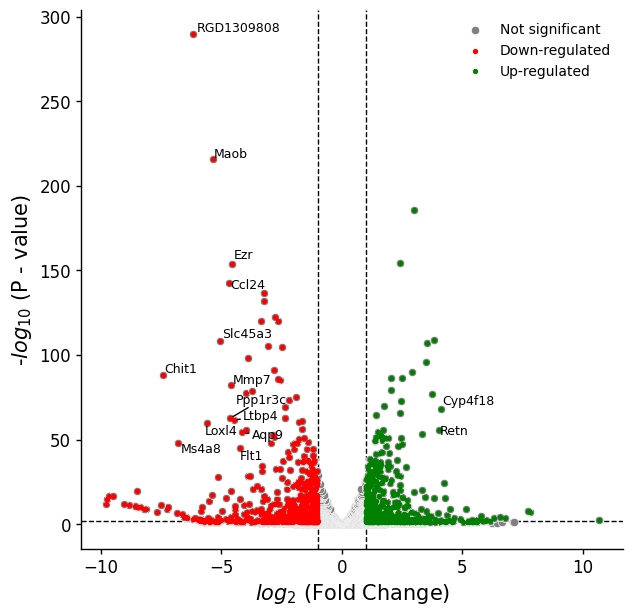

In [29]:
plt.figure(figsize = (7,7))

ax = sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10', color="gray",  label="Not significant")
                   # hue = 'color', hue_order = ['nobody_cares', 'picked1', 'picked2', 'i_care'],
                   # palette = ['lightgrey', 'orange', 'purple', 'grey'],
                   # style = 'shape', style_order = ['picked3', 'picked4', 'not_important'],
                   # markers = ['^', 's', 'o'],
                    #size = 'baseMean', sizes = (10, 100))

# границы значимости
ax.axhline(2, zorder = 0, c = 'k', lw = 1, ls = '--')
ax.axvline(1, zorder = 0, c = 'k', lw = 1, ls = '--')
ax.axvline(-1, zorder = 0, c = 'k', lw = 1, ls = '--')
# легенда для символов
plt.legend(loc = 1, bbox_to_anchor = (1.2,1), frameon = False, prop = {'weight':'regular'})

#удалить границы рисунка
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#толщина оси
ax.tick_params(width = 1)

plt.xticks(size = 12, weight = 'regular')
plt.yticks(size = 12, weight = 'regular')

plt.xlabel("$log_{2}$ (Fold Change)", size = 15)
plt.ylabel("-$log_{10}$ (P - value)", size = 15)
# названия генов
texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 > 30 and abs(df.iloc[i].log2FoldChange) > 4:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].symbol,
                             fontsize = 9, weight = 'regular'))

adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'))

# highlight down- or up- regulated genes
down = df[(df['log2FoldChange']<=-1)&(df['pvalue']<=0.05)]
up = df[(df['log2FoldChange']>=1)&(df['pvalue']<=0.05)]

plt.scatter(x=down['log2FoldChange'],y=down['pvalue'].apply(lambda x:-np.log10(x)),s=8,label="Down-regulated",color="red")
plt.scatter(x=up['log2FoldChange'],y=up['pvalue'].apply(lambda x:-np.log10(x)),s=8,label="Up-regulated",color="green")

plt.legend(loc = 1, bbox_to_anchor = (1,1), frameon = False, prop = {'weight':'regular'})
plt.savefig('volcano.png', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

plt.show()

